In [1]:
import os
import cv2
import random
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from math import ceil

In [2]:
DATA_DIR = 'C:/Users/Mehedi Tamim/Downloads/DATASET'
TRAIN_DATA_DIR = os.path.join(DATA_DIR, 'train')
VALID_DATA_DIR = os.path.join(DATA_DIR, 'valid')
TEST_DATA_DIR = os.path.join(DATA_DIR, 'test')

In [3]:
IMG_SIZE = 32
CATEGORIES = []
for i in os.listdir(TRAIN_DATA_DIR):CATEGORIES.append(i)
print(CATEGORIES)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


Showing the dataset Content

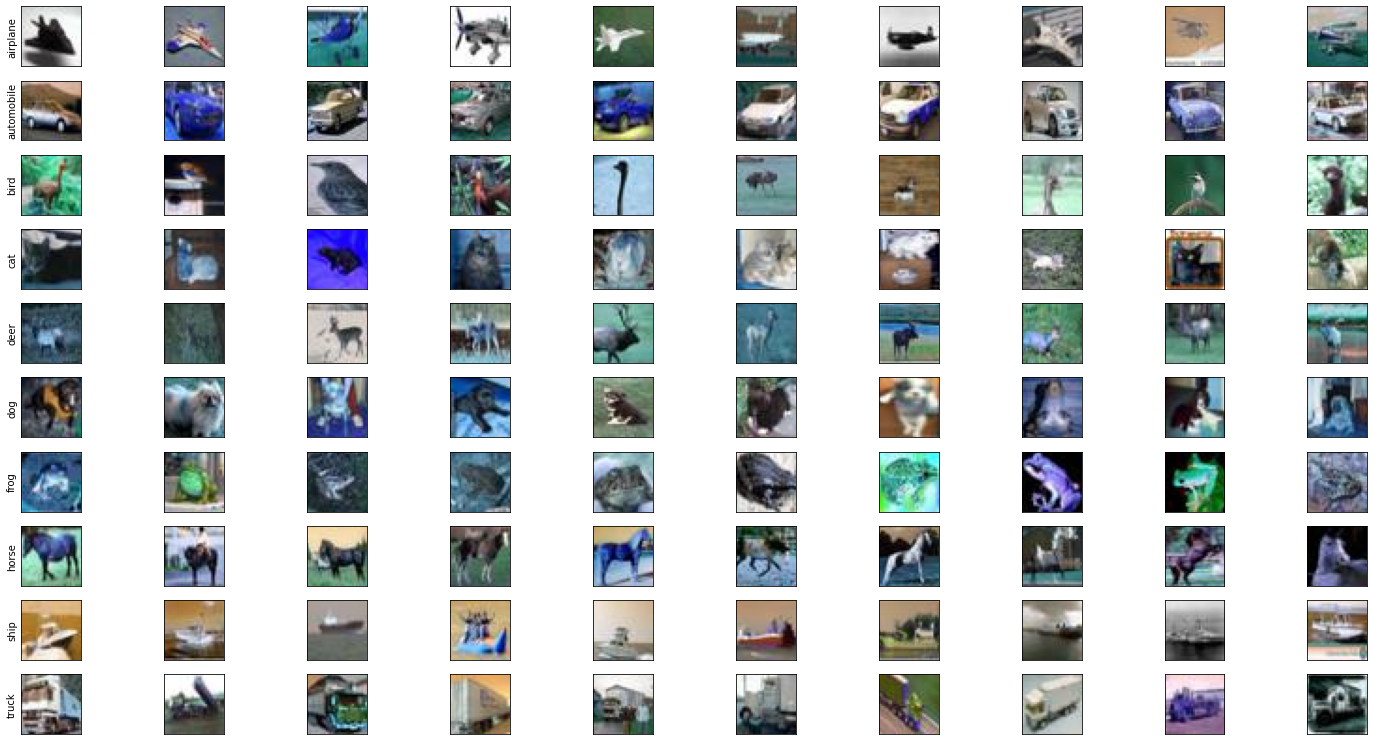

In [5]:
plt.figure(figsize=(20,30))
i=0
for c in CATEGORIES:  
    path = os.path.join(TRAIN_DATA_DIR,c)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.subplot(29,10,i+1)
        plt.imshow(img_array)
        if i%10 == 0:
            plt.ylabel(c)
        plt.xticks([])
        plt.yticks([])
        i += 1
        if i%10 == 0:
            break
plt.tight_layout()        
plt.show()

In [6]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## INITIALIZE THE TRAIN DATASET

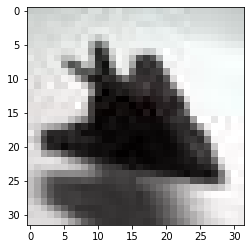

In [8]:
datadir = 'C:/Users/Mehedi Tamim/Downloads/DATASET/train'
classes = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
for cl in classes:
    path = os.path.join(datadir, cl)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(img_array)
        break
    break

In [9]:
img_array.shape

(32, 32, 3)

In [10]:
training_data = []
def create_training_data():
    for cl in classes:
        cls_num = classes.index(cl)
        path = os.path.join(datadir, cl)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                training_data.append([img_array, cls_num])
            except Exception as e:
                pass

In [11]:
create_training_data()
len(training_data)

50000

In [12]:
x_train = []
y_train = []

for pic, label in training_data:
    x_train.append(pic)
    y_train.append(label)

## INITIALIZE THE TEST DATASET

In [14]:
datadir = 'C:/Users/Mehedi Tamim/Downloads/DATASET/test'



test_data = []
def create_test_data():
    for cl in classes:
        cls_num = classes.index(cl)
        path = os.path.join(datadir, cl)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                test_data.append([img_array, cls_num])
            except Exception as e:
                pass
                


In [15]:
create_test_data()
len(test_data)

10000

In [16]:
x_test = []
y_test = []

for pic, label in test_data:
    x_test.append(pic)
    y_test.append(label)

## SHOWING THE SHAPES OF TRAIN AND TEST ARRAYS

In [18]:
X_train=np.array(x_train)
y_train=np.array(y_train)
X_test=np.array(x_test)
y_test=np.array(y_test)

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)


Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


## VISUALIZING THE DATASET SAMPLES

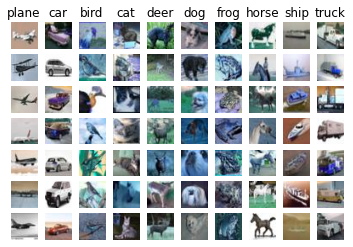

In [20]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

# MEMORY ERROR PREVENTION BY SUBSAMPLING DATA

In [22]:
num_training = 50000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 10000
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

# RESHAPING DATA AND PLACING INTO ROWS

In [24]:
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(50000, 3072) (10000, 3072)


# PERFORMING K-NN

In [26]:
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np
import cv2
from sklearn.neighbors import KNeighborsClassifier
n_neighbors=0
k=0
k_value_list=[]
accuracy_list=[]
for i in range(1,21):
    n_neighbors+=1
    k+=1
    knn=KNeighborsClassifier(n_neighbors)
    knn.fit(X_train,y_train)
    y_pred_knn=knn.predict(X_test)
    y_pred_knn
    accuracy=accuracy_score(y_pred_knn,y_test)
    accuracy1=ceil(accuracy*100)
    k_value_list.append(k)
    accuracy_list.append(accuracy1)
    print("Value of K: {n}, Accuracy: {a}%".format(n=k, a=accuracy1))

Value of K: 1, Accuracy: 36%
Value of K: 2, Accuracy: 32%
Value of K: 3, Accuracy: 33%
Value of K: 4, Accuracy: 34%
Value of K: 5, Accuracy: 34%
Value of K: 6, Accuracy: 35%
Value of K: 7, Accuracy: 34%
Value of K: 8, Accuracy: 35%
Value of K: 9, Accuracy: 34%
Value of K: 10, Accuracy: 35%
Value of K: 11, Accuracy: 35%
Value of K: 12, Accuracy: 35%
Value of K: 13, Accuracy: 35%
Value of K: 14, Accuracy: 35%
Value of K: 15, Accuracy: 35%
Value of K: 16, Accuracy: 34%
Value of K: 17, Accuracy: 35%
Value of K: 18, Accuracy: 34%
Value of K: 19, Accuracy: 35%
Value of K: 20, Accuracy: 34%


## Plotting the relation between the value of k and accuracy

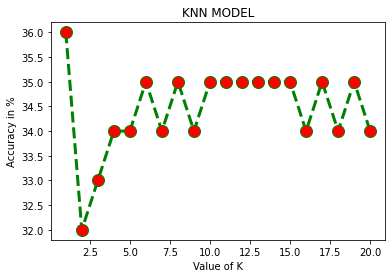

In [27]:
import matplotlib.pyplot as plt
x = k_value_list
y = accuracy_list

plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='red', markersize=12)
 
plt.xlabel('Value of K')
plt.ylabel('Accuracy in %')
plt.title('KNN MODEL')
plt.show()

## Explaining the result 


The CIFAR10 dataset was classified using the KNN algorithm. Our objective was to ascertain the correctness of each K value. We study K values ranging from 1 to 20. Thus, we determined the model's accuracy on the CIFAR10 test set for K = 1 to 20. We determined the precision and plotted it against k. We detected extremely low accuracy, about 32%, and somewhat higher, around 34%, or maybe 36%. The accuracy of a model is relatively low.
The plot of k values and accuracy indicates that accuracy is between 32% and 36%. Once again, it demonstrates a lack of precision.
This begs the question of why the accuracy is so poor. To begin, keep in mind that this CIFAR10 dataset comprises images in the RGB color space. As a result, a neural network would have a higher degree of accuracy. Due to the fact that neural networks operate and learn patterns using numerous layers of neurons, they are more capable of identifying images from a variety of positions.
Traditional machine learning techniques, on the other hand, recognize images geometrically. However, this does not effectively aid in categorizing images, resulting in low accuracy.
Finally, we may assert that neural networks outperform machine learning in categorizing images.


## DATASET LINK
https://github.com/YoongiKim/CIFAR-10-images  